## 응용통계학과 32152339 송준영 

# Explarotary Data Analysis (with pandas)

## 라이브러리 import 및 설정

In [203]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [204]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns   #그래프가 더이쁘게 나옴
import warnings
import io

In [205]:
rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 20)
pd.set_option("display.precision", 2)
warnings.simplefilter('ignore')

## 데이터 다운로드

데이터는 [Dacon 단국대 소/중 데이터 분석 AI 경진대회 웹사이트](https://www.dacon.io/competitions/official/235638/data/)에서 다운로드 받아 `../input` 폴더에 저장.

## EDA

### 학습데이터 로드

In [206]:
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

In [207]:
# !ls "/gdrive/My Drive/Colab Notebooks"

In [208]:
# trn = pd.read_csv('/gdrive/My Drive/Colab Notebooks/train.csv')
# print(trn.shape)
# trn.head()

In [209]:
trn = pd.read_csv('C:/python/DACON_DATA/train.csv')
print(trn.shape)
trn.head()

(320000, 20)


,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
0,0,23.26,20.34,19.01,17.67,16.94,-8.11e-05,23.12,20.26,18.96,17.63,16.91,18,18,1.19,1.19,1.19,1.19,1.19,0
1,1,15.05,14.06,13.45,13.27,13.17,4.51e-03,14.97,14.00,13.41,13.24,13.13,1,1,1.25,1.26,1.25,1.25,1.26,1
2,2,16.79,15.83,15.54,15.39,15.35,4.72e-04,16.61,15.69,15.44,15.32,15.30,2,2,1.02,1.02,1.02,1.02,1.02,0
3,3,25.66,21.19,20.22,19.89,19.63,5.81e-06,25.35,20.99,20.09,19.79,19.56,4,3,1.21,1.21,1.20,1.21,1.21,0
4,4,24.45,20.70,19.04,18.32,17.98,-3.32e-05,23.77,20.43,18.86,18.19,17.88,13,12,1.19,1.19,1.19,1.19,1.19,0


In [210]:
trn.tail()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
319995,319995,18.37,17.24,16.77,16.48,16.34,5.20e-02,18.13,17.04,16.64,16.39,16.29,2,2,1.09,1.09,1.10,1.10,1.09,2
319996,319996,18.69,17.67,17.19,16.82,16.64,8.73e-02,18.52,17.51,17.09,16.74,16.60,2,2,1.05,1.05,1.05,1.05,1.05,1
319997,319997,21.19,18.42,17.30,16.90,16.68,-1.01e-05,20.99,18.31,17.22,16.84,16.64,31,30,1.19,1.19,1.19,1.19,1.19,0
319998,319998,18.85,17.32,16.51,16.18,15.91,-4.52e-05,16.39,15.41,15.18,15.20,15.18,1,1,1.17,1.17,1.17,1.17,1.17,0
319999,319999,19.86,18.82,18.52,18.41,18.31,-9.65e-04,19.83,18.78,18.49,18.40,18.31,1,1,1.06,1.06,1.06,1.06,1.06,0


### 데이터 개요

In [211]:
trn.describe()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,3.20e+05,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00
mean,159999.50,19.85,18.38,17.74,17.17,16.88,5.83e-02,19.63,18.23,17.62,17.15,16.87,6.33,6.14,1.18,1.18,1.18,1.18,1.18,1.12
std,92376.19,1.95,31.11,1.47,52.56,57.15,5.75e-01,1.92,17.79,1.47,25.08,35.44,8.88,8.55,0.12,0.12,0.11,0.12,0.12,0.92
min,0.00,-17.69,-17555.37,7.73,-23955.82,-23955.82,-1.66e+02,-42.84,-9999.00,-16.38,-9999.00,-9999.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,79999.75,18.72,17.47,16.88,16.52,16.29,3.56e-05,18.56,17.35,16.79,16.45,16.23,1.00,1.00,1.09,1.09,1.09,1.09,1.09,0.00
50%,159999.50,19.42,18.14,17.53,17.15,16.92,4.71e-02,19.26,18.02,17.44,17.09,16.87,2.00,2.00,1.18,1.18,1.18,1.18,1.18,1.00
75%,239999.25,20.43,19.07,18.43,18.01,17.73,9.46e-02,20.20,18.89,18.29,17.91,17.66,5.00,5.00,1.23,1.23,1.23,1.23,1.23,2.00
max,319999.00,58.62,46.34,72.01,50.16,52.61,6.23e+01,30.78,30.61,31.96,32.02,30.78,44.00,42.00,2.05,2.08,2.02,2.04,2.07,2.00


In [212]:
trn.dtypes

id             int64
u            float64
g            float64
r            float64
i            float64
z            float64
redshift     float64
dered_u      float64
dered_g      float64
dered_r      float64
dered_i      float64
dered_z      float64
nObserve       int64
nDetect        int64
airmass_u    float64
airmass_g    float64
airmass_r    float64
airmass_i    float64
airmass_z    float64
class          int64
dtype: object

### 종속변수 분포

In [213]:
trn['class'].value_counts().sort_index()

0    119996
1     42785
2    157219
Name: class, dtype: int64

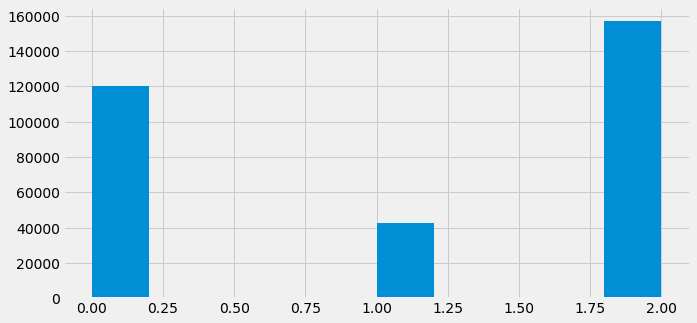

In [214]:
trn['class'].hist()

### 독립변수 분포

In [215]:
trn.quantile(np.arange(0,1,.01))

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
0.00,0.00,-17.69,-17555.37,7.73,-23955.82,-23955.82,-1.66e+02,-42.84,-9999.00,-16.38,-9999.00,-9999.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00,0.0
0.01,3199.99,16.51,15.32,14.79,14.46,14.18,-8.99e-04,15.84,14.73,14.32,14.12,13.95,1.0,1.0,1.01,1.01,1.01,1.01,1.01,0.0
0.02,6399.98,16.88,15.69,15.18,14.87,14.60,-6.76e-04,16.48,15.33,14.89,14.63,14.42,1.0,1.0,1.01,1.01,1.01,1.01,1.01,0.0
0.03,9599.97,17.11,15.91,15.40,15.10,14.83,-5.48e-04,16.78,15.63,15.19,14.93,14.70,1.0,1.0,1.01,1.01,1.01,1.01,1.01,0.0
0.04,12799.96,17.29,16.09,15.55,15.25,15.01,-4.51e-04,17.00,15.84,15.37,15.11,14.89,1.0,1.0,1.02,1.02,1.02,1.02,1.02,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.95,303999.05,24.06,21.84,20.48,19.68,19.44,1.82e-01,23.82,21.55,20.34,19.60,19.38,27.0,26.0,1.39,1.40,1.39,1.39,1.40,2.0
0.96,307199.04,24.40,22.14,20.68,19.87,19.63,1.95e-01,24.09,21.88,20.55,19.79,19.58,28.0,27.0,1.41,1.41,1.40,1.40,1.41,2.0
0.97,310399.03,24.80,22.47,20.96,20.06,19.85,2.15e-01,24.40,22.29,20.86,19.98,19.80,30.0,29.0,1.43,1.44,1.43,1.43,1.44,2.0
0.98,313599.02,25.26,22.82,21.28,20.25,20.13,2.45e-01,24.72,22.68,21.19,20.17,20.09,32.0,30.0,1.50,1.52,1.49,1.50,1.51,2.0


In [216]:
trn.describe()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,3.20e+05,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00
mean,159999.50,19.85,18.38,17.74,17.17,16.88,5.83e-02,19.63,18.23,17.62,17.15,16.87,6.33,6.14,1.18,1.18,1.18,1.18,1.18,1.12
std,92376.19,1.95,31.11,1.47,52.56,57.15,5.75e-01,1.92,17.79,1.47,25.08,35.44,8.88,8.55,0.12,0.12,0.11,0.12,0.12,0.92
min,0.00,-17.69,-17555.37,7.73,-23955.82,-23955.82,-1.66e+02,-42.84,-9999.00,-16.38,-9999.00,-9999.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,79999.75,18.72,17.47,16.88,16.52,16.29,3.56e-05,18.56,17.35,16.79,16.45,16.23,1.00,1.00,1.09,1.09,1.09,1.09,1.09,0.00
50%,159999.50,19.42,18.14,17.53,17.15,16.92,4.71e-02,19.26,18.02,17.44,17.09,16.87,2.00,2.00,1.18,1.18,1.18,1.18,1.18,1.00
75%,239999.25,20.43,19.07,18.43,18.01,17.73,9.46e-02,20.20,18.89,18.29,17.91,17.66,5.00,5.00,1.23,1.23,1.23,1.23,1.23,2.00
max,319999.00,58.62,46.34,72.01,50.16,52.61,6.23e+01,30.78,30.61,31.96,32.02,30.78,44.00,42.00,2.05,2.08,2.02,2.04,2.07,2.00


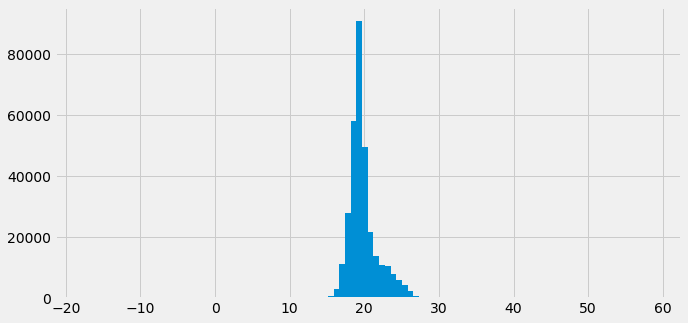

In [217]:
trn['u'].hist(bins=100)

In [218]:
trn['redshift'].quantile(np.arange(0, 1, .0001)) #분위수 확인

0.00e+00   -166.05
1.00e-04     -8.23
2.00e-04     -4.36
3.00e-04     -2.49
4.00e-04     -1.81
             ...  
1.00e+00      1.59
1.00e+00      2.05
1.00e+00      2.93
1.00e+00      4.69
1.00e+00      8.57
Name: redshift, Length: 10000, dtype: float64

In [219]:
trn.describe()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,3.20e+05,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00
mean,159999.50,19.85,18.38,17.74,17.17,16.88,5.83e-02,19.63,18.23,17.62,17.15,16.87,6.33,6.14,1.18,1.18,1.18,1.18,1.18,1.12
std,92376.19,1.95,31.11,1.47,52.56,57.15,5.75e-01,1.92,17.79,1.47,25.08,35.44,8.88,8.55,0.12,0.12,0.11,0.12,0.12,0.92
min,0.00,-17.69,-17555.37,7.73,-23955.82,-23955.82,-1.66e+02,-42.84,-9999.00,-16.38,-9999.00,-9999.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,79999.75,18.72,17.47,16.88,16.52,16.29,3.56e-05,18.56,17.35,16.79,16.45,16.23,1.00,1.00,1.09,1.09,1.09,1.09,1.09,0.00
50%,159999.50,19.42,18.14,17.53,17.15,16.92,4.71e-02,19.26,18.02,17.44,17.09,16.87,2.00,2.00,1.18,1.18,1.18,1.18,1.18,1.00
75%,239999.25,20.43,19.07,18.43,18.01,17.73,9.46e-02,20.20,18.89,18.29,17.91,17.66,5.00,5.00,1.23,1.23,1.23,1.23,1.23,2.00
max,319999.00,58.62,46.34,72.01,50.16,52.61,6.23e+01,30.78,30.61,31.96,32.02,30.78,44.00,42.00,2.05,2.08,2.02,2.04,2.07,2.00


# 피쳐 추가

In [220]:
df=trn.copy()

In [221]:
from tqdm import tqdm

In [222]:
names=['u','g','r','i','z']

for i in tqdm(range(len(names))):
    for j in range(len(names)):
        df[names[i]+'-'+names[j-1]]=df[names[i]]-df[names[j-1]]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 68.67it/s]


In [223]:
dered_names=['dered_u','dered_g','dered_r','dered_i','dered_z']

for i in tqdm(range(len(dered_names))):
    for j in range(len(dered_names)):
        df[dered_names[i]+'-'+dered_names[j-1]]=df[dered_names[i]]-df[dered_names[j-1]]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 73.73it/s]


In [224]:
df['nObserve-nDetect']=df['nObserve']-df['nDetect']

In [225]:
dif_feature=['u-u','g-g','r-r','i-i','z-z','dered_u-dered_u','dered_g-dered_g','dered_r-dered_r','dered_i-dered_i','dered_z-dered_z']
df=df[df.columns.difference(dif_feature)] #중복연산열 제거

In [226]:
#출처: https://www.sdss.org/dr16/algorithms/segue_target_selection/#Legacy
df['l-color'] = (-0.436*df['u']) + (1.129*df['g']) - (0.119*df['r']) - (0.574*df['i']) + (0.1984)
df['s-color'] = (-0.249*df['u']) + (0.794*df['g']) - (0.555*df['r']) + (0.234)
df['P1'] = (0.91*df['u-g']) + (0.415*df['g-r']) - (1.280)

In [227]:
df

,airmass_g,airmass_i,airmass_r,airmass_u,airmass_z,class,dered_g,dered_g-dered_i,dered_g-dered_r,dered_g-dered_u,...,u-r,u-z,z,z-g,z-i,z-r,z-u,l-color,s-color,P1
0,1.19,1.19,1.19,1.19,1.19,0,20.26,2.63,1.30,-2.87,...,4.25,6.32,16.94,-3.40,-0.73,-2.07,-6.32,6.09e-01,3.84e-02,1.93
1,1.26,1.25,1.25,1.25,1.26,1,14.00,0.77,0.59,-0.96,...,1.60,1.88,13.17,-0.89,-0.10,-0.28,-1.88,2.95e-01,1.85e-01,-0.13
2,1.02,1.02,1.02,1.02,1.02,0,15.69,0.36,0.25,-0.92,...,1.25,1.44,15.35,-0.48,-0.04,-0.19,-1.44,6.17e-02,-3.08e-03,-0.29
3,1.21,1.21,1.20,1.21,1.21,0,20.99,1.20,0.91,-4.36,...,5.44,6.03,19.63,-1.55,-0.26,-0.59,-6.03,-8.94e-01,-5.54e-01,3.19
4,1.19,1.19,1.19,1.19,1.19,0,20.43,2.24,1.57,-3.34,...,5.41,6.47,17.98,-2.72,-0.34,-1.06,-6.47,1.22e-01,1.17e-02,2.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,1.09,1.10,1.10,1.09,1.09,2,17.04,0.65,0.40,-1.09,...,1.59,2.03,16.34,-0.90,-0.14,-0.43,-2.03,1.97e-01,4.07e-02,-0.06
319996,1.05,1.05,1.05,1.05,1.05,1,17.51,0.77,0.43,-1.01,...,1.50,2.05,16.64,-1.03,-0.18,-0.55,-2.05,2.98e-01,6.72e-02,-0.15
319997,1.19,1.19,1.19,1.19,1.19,0,18.31,1.47,1.09,-2.68,...,3.89,4.50,16.68,-1.74,-0.22,-0.61,-4.50,5.86e-04,-1.30e-02,1.70
319998,1.17,1.17,1.17,1.17,1.17,0,15.41,0.21,0.22,-0.98,...,2.34,2.94,15.91,-1.41,-0.27,-0.59,-2.94,2.82e-01,1.31e-01,0.45


In [228]:
# 최대 열 수 설정
pd.set_option('display.max_columns', 500)
df.describe()

,airmass_g,airmass_i,airmass_r,airmass_u,airmass_z,class,dered_g,dered_g-dered_i,dered_g-dered_r,dered_g-dered_u,dered_g-dered_z,dered_i,dered_i-dered_g,dered_i-dered_r,dered_i-dered_u,dered_i-dered_z,dered_r,dered_r-dered_g,dered_r-dered_i,dered_r-dered_u,dered_r-dered_z,dered_u,dered_u-dered_g,dered_u-dered_i,dered_u-dered_r,dered_u-dered_z,dered_z,dered_z-dered_g,dered_z-dered_i,dered_z-dered_r,dered_z-dered_u,g,g-i,g-r,g-u,g-z,i,i-g,i-r,i-u,i-z,id,nDetect,nObserve,nObserve-nDetect,r,r-g,r-i,r-u,r-z,redshift,u,u-g,u-i,u-r,u-z,z,z-g,z-i,z-r,z-u,l-color,s-color,P1
count,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,3.20e+05,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,3.20e+05,320000.00
mean,1.18,1.18,1.18,1.18,1.18,1.12,18.23,1.07,0.61,-1.40,1.36,17.15,-1.07,-0.46,-2.48,0.28,17.62,-0.61,0.46,-2.01,0.75,19.63,1.40,2.48,2.01,2.76,16.87,-1.36,-0.28,-0.75,-2.76,18.38,1.20,0.64,-1.48,1.50,17.17,-1.20,-0.56,-2.68,0.30,159999.50,6.14,6.33,0.19,17.74,-0.64,0.56,-2.12,0.86,5.83e-02,19.85,1.48,2.68,2.12,2.98,16.88,-1.50,-0.30,-0.86,-2.98,0.32,3.86e-02,0.33
std,0.12,0.12,0.11,0.12,0.12,0.92,17.79,17.73,17.72,17.72,30.69,25.08,17.73,25.05,25.08,25.04,1.47,17.72,25.05,1.05,35.42,1.92,17.72,25.08,1.05,35.44,35.44,30.69,25.04,35.42,35.44,31.11,42.39,31.07,31.08,47.96,52.56,42.39,52.55,52.56,22.43,92376.19,8.55,8.88,1.02,1.47,31.07,52.55,1.13,57.14,5.75e-01,1.95,31.08,52.56,1.13,57.15,57.15,47.96,22.43,57.14,57.15,29.82,2.47e+01,15.40
min,1.00,1.00,1.00,1.00,1.00,0.00,-9999.00,-21.86,-10016.81,-10018.77,-27.77,-9999.00,-10017.13,-10016.83,-10018.77,-16.66,-16.38,-15.30,-13.57,-14.99,-17.74,-42.84,-12.52,-34.38,-26.82,-40.29,-9999.00,-10017.26,-10016.56,-10016.88,-10018.77,-17555.37,-37.44,-17573.27,-17575.35,-34.37,-23955.82,-23974.10,-23973.76,-23975.20,-37.44,0.00,1.00,1.00,-1.00,7.73,-31.56,-33.47,-43.23,-32.44,-1.66e+02,-17.69,-32.11,-32.33,-55.07,-29.82,-23955.82,-23974.10,-9808.72,-23973.76,-23975.20,-9753.87,-1.40e+04,-30.08
25%,1.09,1.09,1.09,1.09,1.09,0.00,17.35,0.60,0.38,-1.55,0.70,16.45,-1.23,-0.43,-2.80,0.08,16.79,-0.81,0.21,-2.36,0.31,18.56,1.04,1.65,1.42,1.75,16.23,-1.53,-0.30,-0.71,-3.09,17.47,0.67,0.43,-1.60,0.79,16.52,-1.30,-0.45,-2.91,0.11,79999.75,1.00,1.00,0.00,16.88,-0.86,0.24,-2.45,0.36,3.56e-05,18.72,1.07,1.76,1.50,1.89,16.29,-1.61,-0.31,-0.76,-3.22,0.11,2.01e-03,-0.13
50%,1.18,1.18,1.18,1.18,1.18,1.00,18.02,0.92,0.58,-1.23,1.12,17.09,-0.92,-0.34,-2.16,0.20,17.44,-0.58,0.34,-1.82,0.53,19.26,1.23,2.16,1.82,2.36,16.87,-1.12,-0.20,-0.53,-2.36,18.14,0.98,0.63,-1.27,1.20,17.15,-0.98,-0.36,-2.27,0.22,159999.50,2.00,2.00,0.00,17.53,-0.63,0.36,-1.90,0.58,4.71e-02,19.42,1.27,2.27,1.90,2.49,16.92,-1.20,-0.22,-0.58,-2.49,0.25,6.51e-02,0.14
75%,1.23,1.23,1.23,1.23,1.23,2.00,18.89,1.23,0.81,-1.04,1.53,17.91,-0.60,-0.21,-1.65,0.30,18.29,-0.38,0.43,-1.42,0.71,20.20,1.55,2.80,2.36,3.09,17.66,-0.70,-0.08,-0.31,-1.75,19.07,1.30,0.86,-1.07,1.61,18.01,-0.67,-0.24,-1.76,0.31,239999.25,5.00,5.00,0.00,18.43,-0.43,0.45,-1.50,0.76,9.46e-02,20.43,1.60,2.91,2.45,3.22,17.73,-0.79,-0.11,-0.36,-1.89,0.38,1.32e-01,0.52
max,2.08,2.04,2.02,2.05,2.07,2.00,30.61,10017.13,15.30,12.52,10017.26,32.02,21.86,13.57,34.38,10016.56,31.96,10016.81,10016.83,26.82,10016.88,30.78,10018.77,10018.77,14.99,10018.77,30.78,27.77,16.66,17.74,40.29,46.34,23974.10,31.56,32.11,23974.10,50.16,37.44,33.47,32.33,9808.72,319999.00,42.00,44.00,40.00,72.01,17573.27,23973.76,55.07,23973.76,6.23e+01,58.62,17575.35,23975.20,43.23,23975.20,52.61,34.37,37.44,32.44,29.82,1376

In [229]:
np.shape(df)

(320000, 64)

# test데이터의 각 피쳐별 mim max 파악

In [230]:
tst = pd.read_csv('C:/python/DACON_DATA/test.csv')
print(tst.shape)

(80000, 19)


In [231]:
tst.describe()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
count,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,8.00e+04,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00,80000.00
mean,359999.50,19.86,18.44,17.74,17.31,17.15,6.01e-02,19.63,18.26,17.62,17.22,16.87,6.35,6.16,1.18,1.18,1.18,1.18,1.18
std,23094.16,1.95,1.70,1.48,1.32,24.64,3.47e-01,1.92,1.67,1.48,1.33,35.44,8.87,8.55,0.12,0.12,0.11,0.12,0.12
min,320000.00,-0.34,-51.18,-5.44,5.33,-39.53,-3.01e+01,-30.63,-18.66,-8.76,-3.70,-9999.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,339999.75,18.73,17.48,16.88,16.53,16.29,3.36e-05,18.57,17.35,16.79,16.46,16.23,1.00,1.00,1.09,1.09,1.09,1.09,1.09
50%,359999.50,19.43,18.15,17.53,17.16,16.92,4.71e-02,19.27,18.02,17.45,17.09,16.87,2.00,2.00,1.18,1.18,1.18,1.18,1.18
75%,379999.25,20.43,19.08,18.43,18.01,17.73,9.48e-02,20.20,18.89,18.30,17.91,17.66,5.00,5.00,1.23,1.23,1.23,1.23,1.23
max,399999.00,56.85,94.36,46.69,33.03,6976.39,4.64e+01,30.89,30.95,31.65,30.95,28.64,44.00,42.00,2.05,2.08,2.02,2.04,2.06


In [232]:
trn = pd.read_csv('C:/python/DACON_DATA/train.csv')
print(trn.shape)
trn.head()

(320000, 20)


,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
0,0,23.26,20.34,19.01,17.67,16.94,-8.11e-05,23.12,20.26,18.96,17.63,16.91,18,18,1.19,1.19,1.19,1.19,1.19,0
1,1,15.05,14.06,13.45,13.27,13.17,4.51e-03,14.97,14.00,13.41,13.24,13.13,1,1,1.25,1.26,1.25,1.25,1.26,1
2,2,16.79,15.83,15.54,15.39,15.35,4.72e-04,16.61,15.69,15.44,15.32,15.30,2,2,1.02,1.02,1.02,1.02,1.02,0
3,3,25.66,21.19,20.22,19.89,19.63,5.81e-06,25.35,20.99,20.09,19.79,19.56,4,3,1.21,1.21,1.20,1.21,1.21,0
4,4,24.45,20.70,19.04,18.32,17.98,-3.32e-05,23.77,20.43,18.86,18.19,17.88,13,12,1.19,1.19,1.19,1.19,1.19,0


In [233]:
trn.describe()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,3.20e+05,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00,320000.00
mean,159999.50,19.85,18.38,17.74,17.17,16.88,5.83e-02,19.63,18.23,17.62,17.15,16.87,6.33,6.14,1.18,1.18,1.18,1.18,1.18,1.12
std,92376.19,1.95,31.11,1.47,52.56,57.15,5.75e-01,1.92,17.79,1.47,25.08,35.44,8.88,8.55,0.12,0.12,0.11,0.12,0.12,0.92
min,0.00,-17.69,-17555.37,7.73,-23955.82,-23955.82,-1.66e+02,-42.84,-9999.00,-16.38,-9999.00,-9999.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,79999.75,18.72,17.47,16.88,16.52,16.29,3.56e-05,18.56,17.35,16.79,16.45,16.23,1.00,1.00,1.09,1.09,1.09,1.09,1.09,0.00
50%,159999.50,19.42,18.14,17.53,17.15,16.92,4.71e-02,19.26,18.02,17.44,17.09,16.87,2.00,2.00,1.18,1.18,1.18,1.18,1.18,1.00
75%,239999.25,20.43,19.07,18.43,18.01,17.73,9.46e-02,20.20,18.89,18.29,17.91,17.66,5.00,5.00,1.23,1.23,1.23,1.23,1.23,2.00
max,319999.00,58.62,46.34,72.01,50.16,52.61,6.23e+01,30.78,30.61,31.96,32.02,30.78,44.00,42.00,2.05,2.08,2.02,2.04,2.07,2.00


In [234]:
fea=['u', 'g', 'r', 'i', 'z', 'redshift', 'dered_u', 'dered_g','dered_r', 'dered_i', 'dered_z']
for i in range(len(fea)):    
    trn=trn[trn[fea[i]]>np.min(tst[fea[i]], axis=0)]
    trn=trn[trn[fea[i]]<np.max(tst[fea[i]], axis=0)]

# 독립변수에서 잘못 입력된 값(음수) 제거 (수정 필 _ 테스트 데이터의 민맥스로)


In [235]:
# print(len(trn.loc[trn['u'] < 0]))
# trn=trn[trn['u']>0]
# print(len(trn.loc[trn['g'] < 0]))
# trn=trn[trn['g']>0]
# print(len(trn.loc[trn['r'] < 0]))
# print(len(trn.loc[trn['i'] < 0]))
# trn=trn[trn['i']>0]
# print(len(trn.loc[trn['z'] < 0]))
# trn=trn[trn['z']>0]
# trn.describe()

In [236]:
# (trn.loc[trn['dered_u'] < 0])
# trn=trn[trn['dered_u']>0]
# trn=trn[trn['dered_g']>0]
# trn=trn[trn['dered_r']>0]
# trn=trn[trn['dered_i']>0]
# trn=trn[trn['dered_z']>0]
# trn.describe()

In [237]:
# trn

# 라벨 수준별 시각화

In [238]:
seed=32152339

In [239]:
trn_sample = trn.sample(n=10000, random_state=seed) #시각화의 경우 시간 소요가 오래걸리므로 10000개만 표본추출

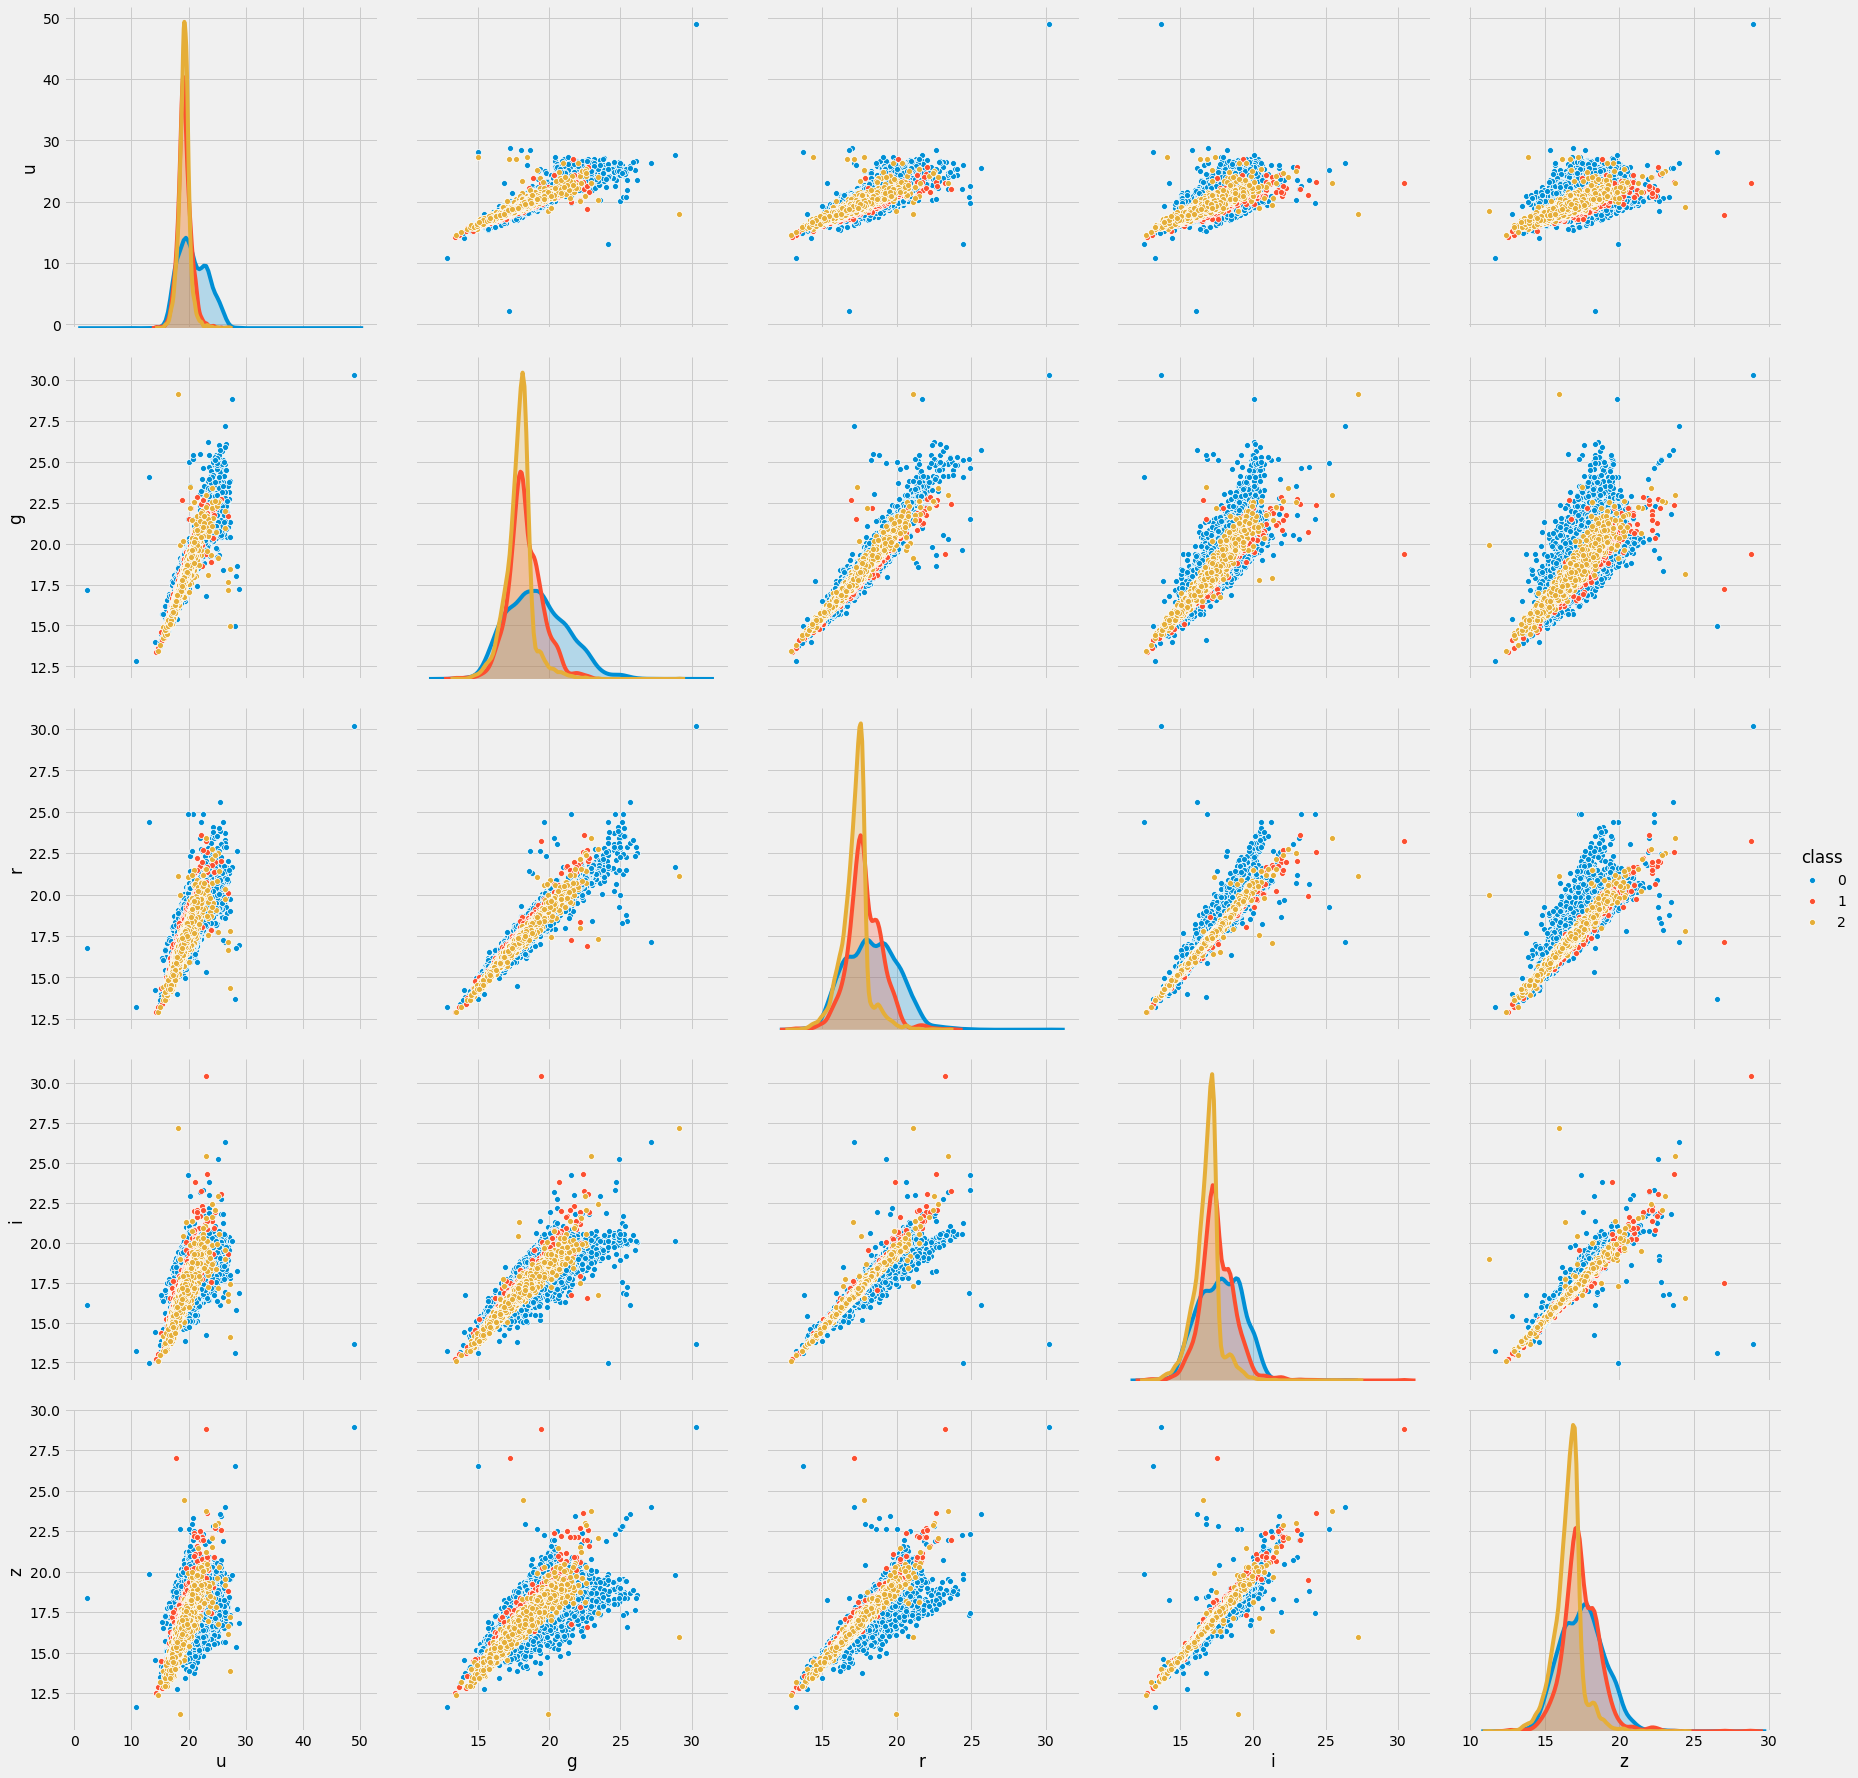

In [240]:
sns.pairplot(data=trn_sample, vars=['u', 'g', 'r', 'i', 'z'], hue='class', size=5) 
#0의 경우 상대적으로 타 class와 뚜렷이 구분되어 보임.
#1과 2의 경우 비슷한 분포를 보임.

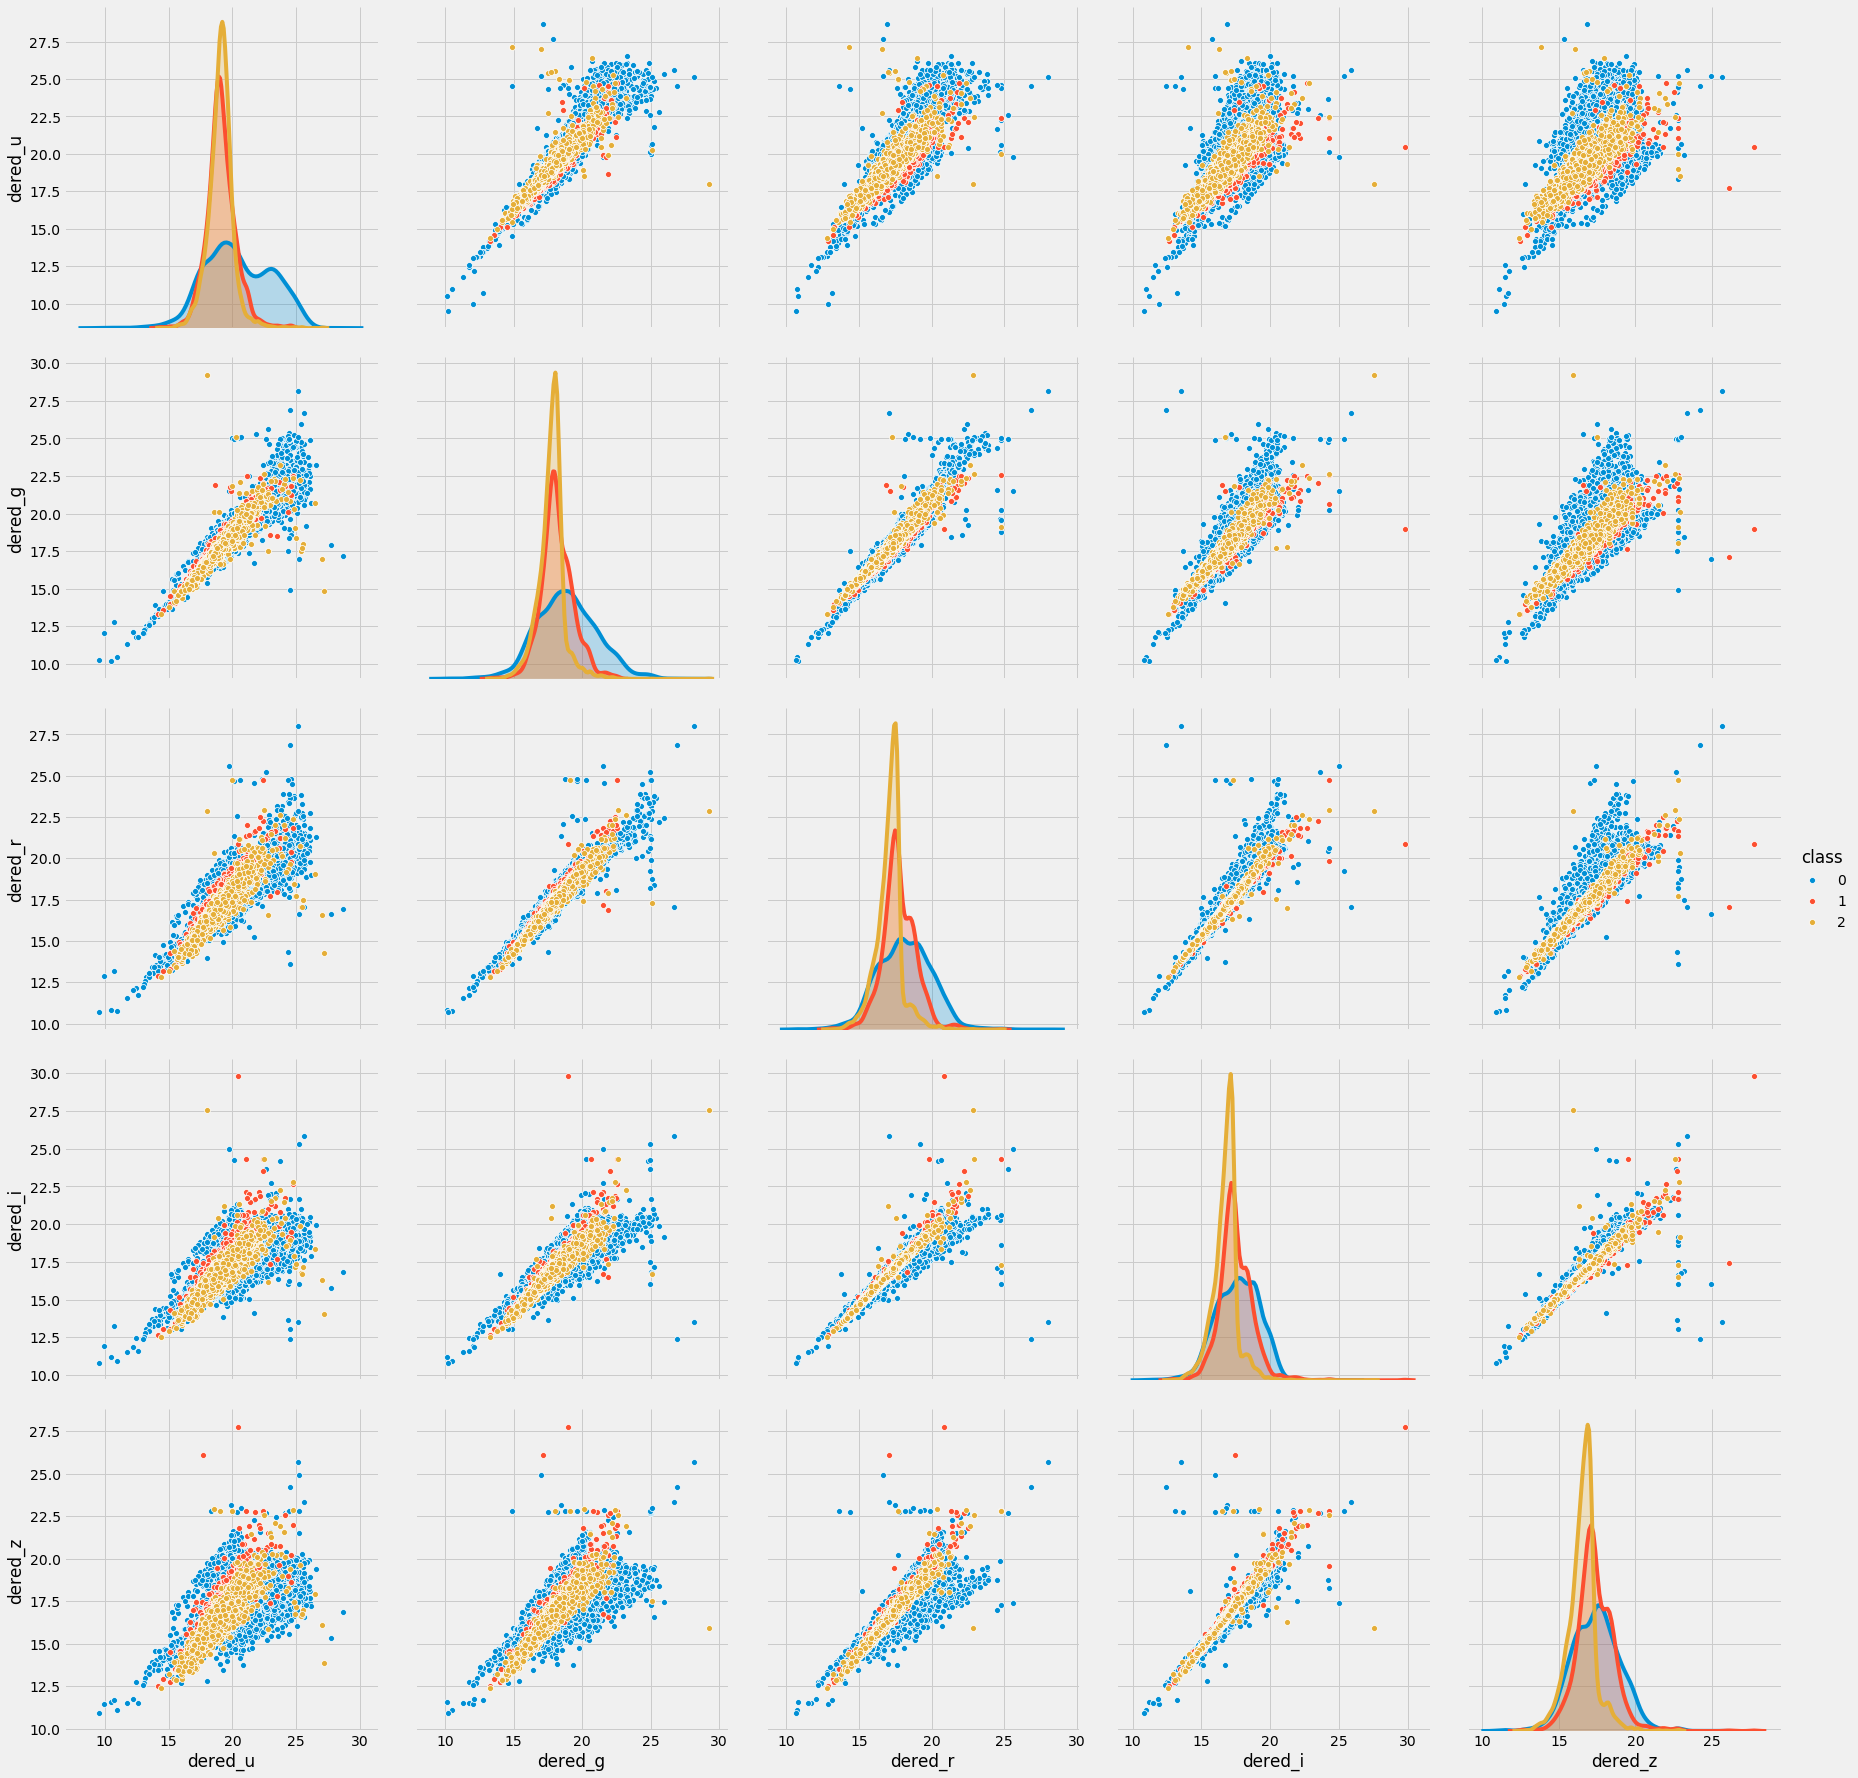

In [241]:
sns.pairplot(data=trn_sample, vars=['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z'], hue='class', size=5)
#위와 비슷한 형태

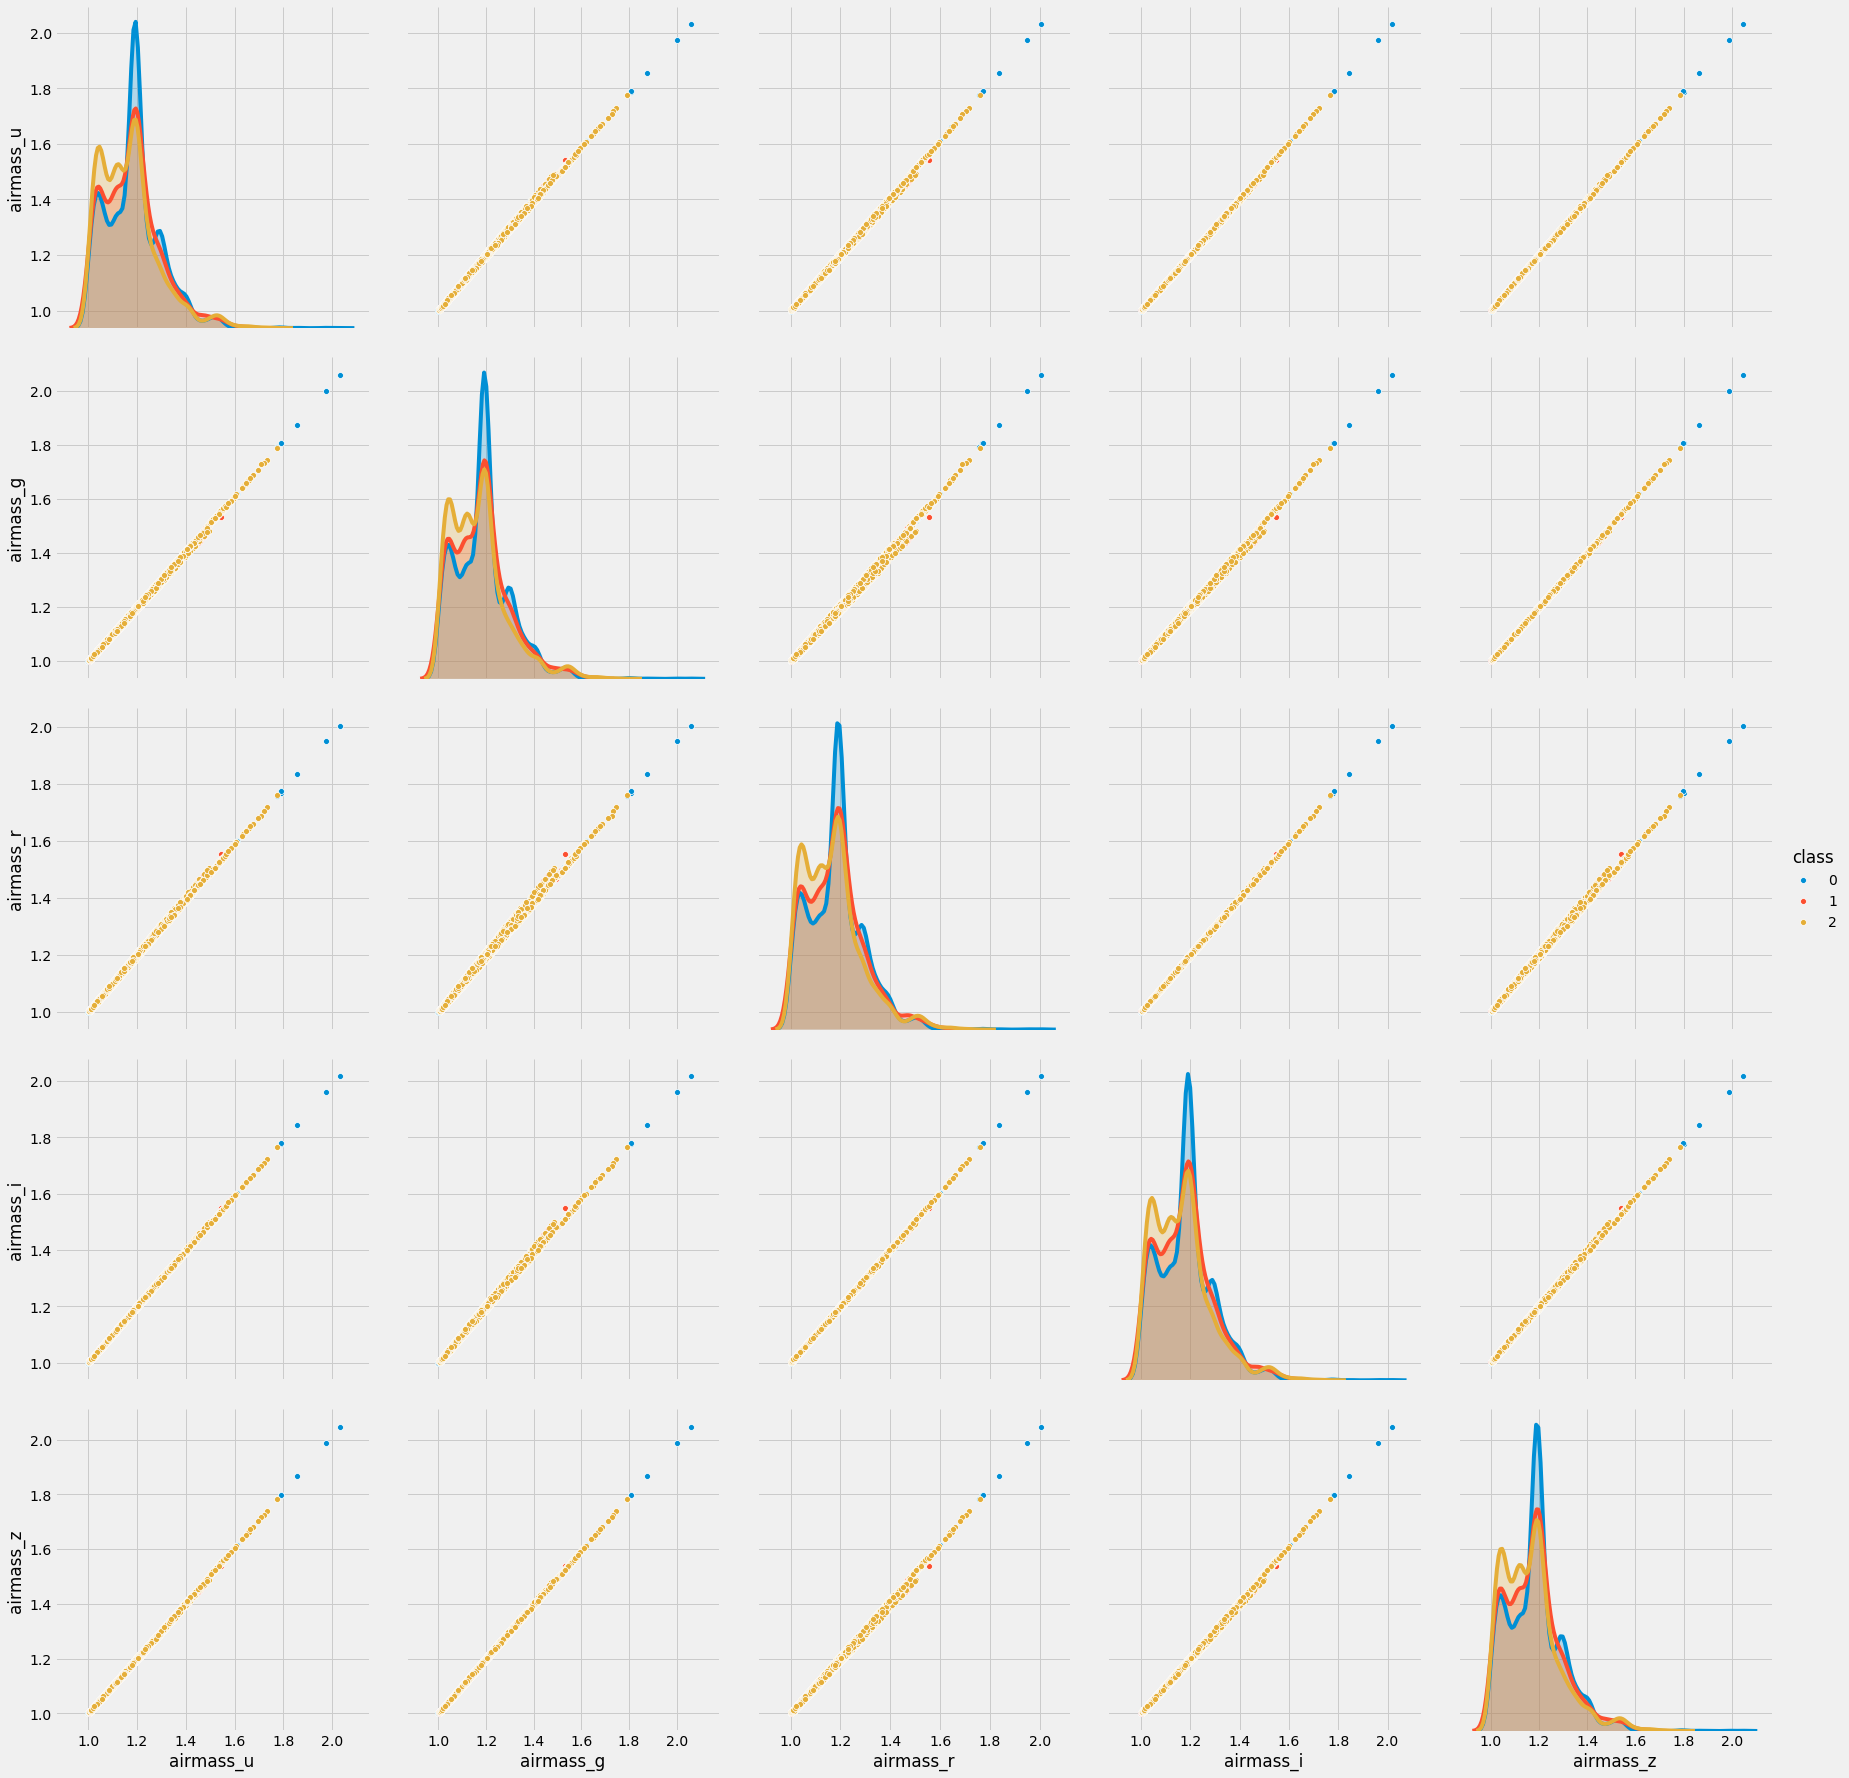

In [242]:
sns.pairplot(data=trn_sample, vars=['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], hue='class', size=5)
#아래와 같이 상관계수가 1에 가까워보이므로 상관계수 확인 필요. 상관계수가 1에 과도하게 가깝다면 변수 통합.

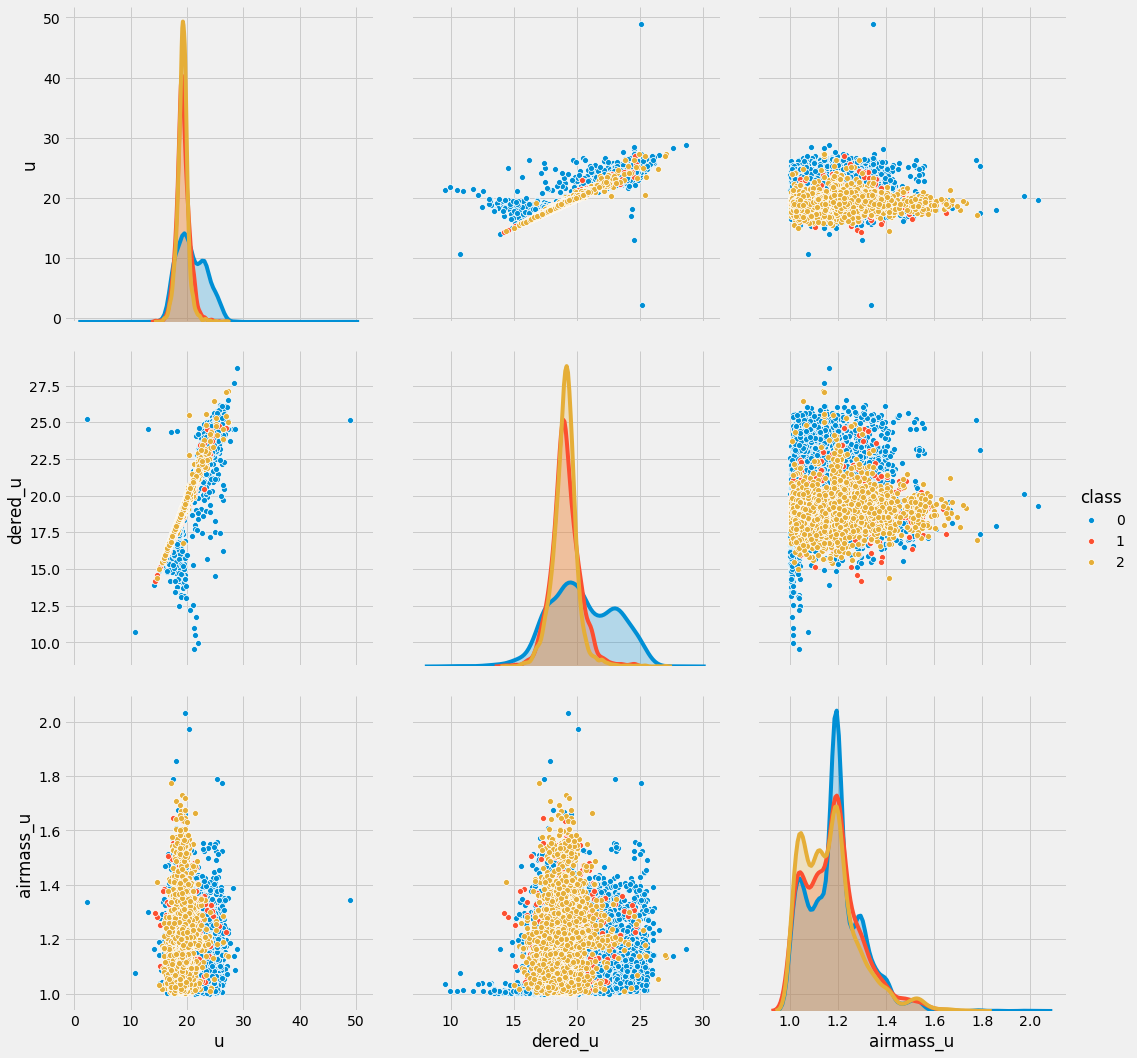

In [243]:
sns.pairplot(data=trn_sample, vars=['u', 'dered_u', 'airmass_u'], hue='class', size=5)

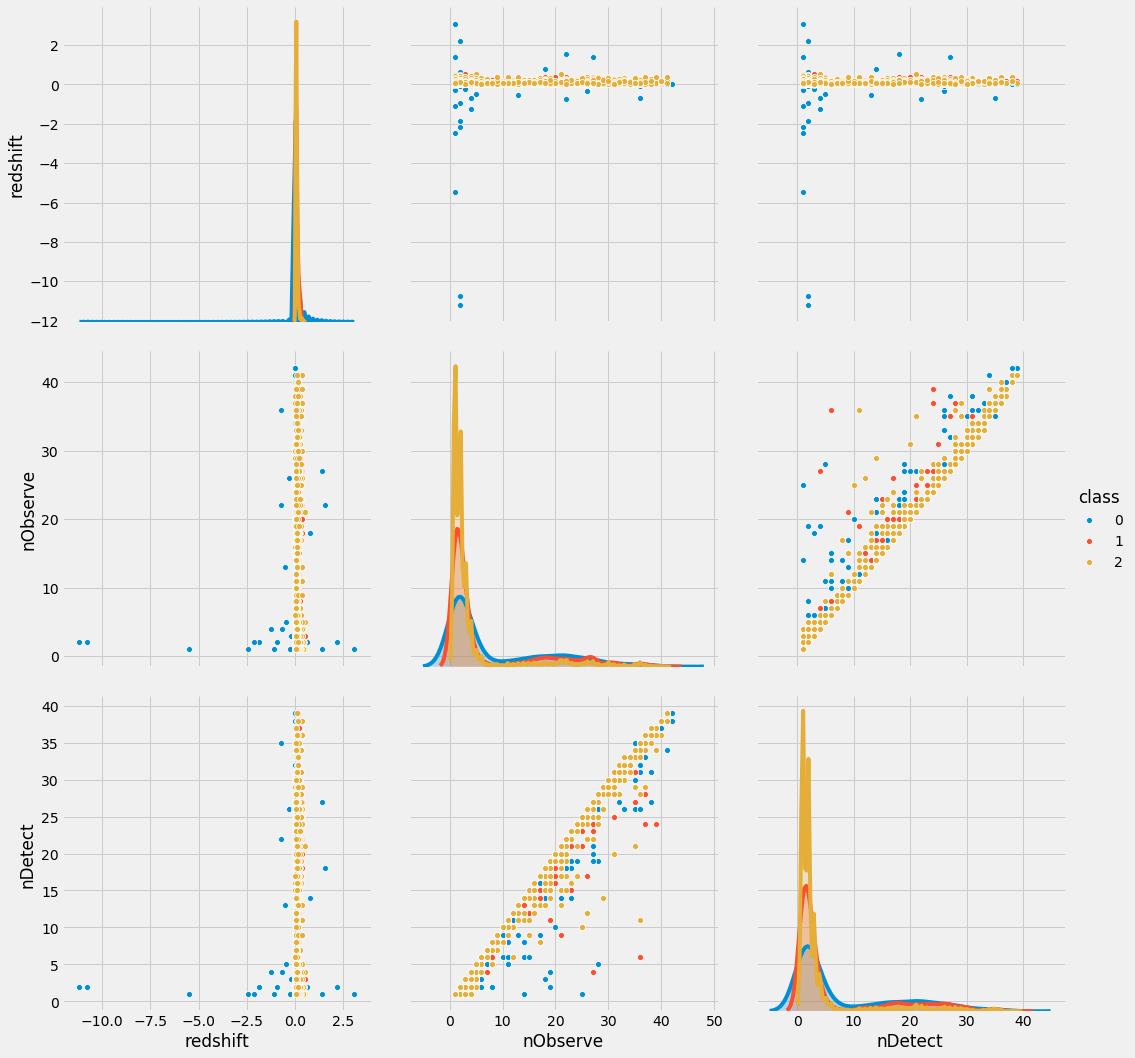

In [244]:
sns.pairplot(data=trn_sample, vars=['redshift', 'nObserve', 'nDetect'], hue='class', size=5)

In [245]:
trn.groupby('class').mean()

,id,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
class,,,,,,,,,,,,,,,,,,,
0,159784.67,20.86,19.21,18.39,17.84,17.55,3.39e-03,20.52,18.95,18.21,17.70,17.45,8.56,8.31,1.19,1.19,1.19,1.19,1.19
1,160296.88,19.27,18.29,17.84,17.54,17.42,1.06e-01,19.11,18.16,17.75,17.48,17.37,7.05,6.76,1.18,1.18,1.18,1.18,1.18
2,160077.61,19.24,17.87,17.20,16.83,16.59,9.18e-02,19.09,17.76,17.12,16.77,16.54,4.44,4.31,1.17,1.17,1.17,1.17,1.17


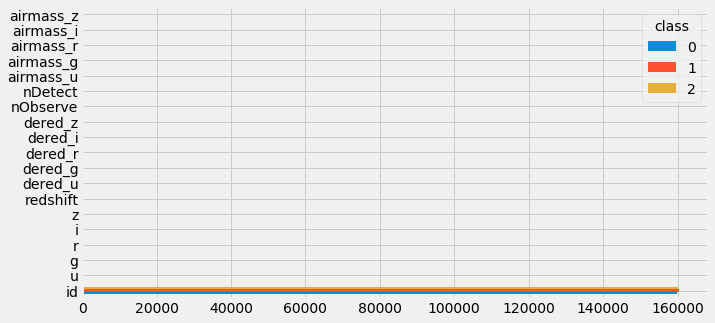

In [246]:
trn.groupby('class').mean().T.plot(kind='barh')

### 시험 데이터 로드

In [247]:

tst = pd.read_csv('/gdrive/My Drive/Colab Notebooks/test.csv')
print(tst.shape)
tst.head()

FileNotFoundError: [Errno 2] File b'/gdrive/My Drive/Colab Notebooks/test.csv' does not exist: b'/gdrive/My Drive/Colab Notebooks/test.csv'

In [ ]:
tst.describe()

### 학습/시험 데이터 결합

In [ ]:
# df = pd.concat([trn, tst], axis=0)
# print(df.shape)
# df.tail()

In [ ]:
# df.fillna(0, inplace=True)
# df.tail()

### 피쳐 변환

In [ ]:
#df['nObserve'].hist(bins=30)

In [ ]:
#df['nObserve'] = df['nObserve'].apply(np.log1p)

In [ ]:
#df['nObserve'].hist(bins=30)

### 피쳐 생성

In [ ]:
# df['d_dered_u'] = df['dered_u'] - df['u']
# df['d_dered_g'] = df['dered_g'] - df['g']
# df['d_dered_r'] = df['dered_r'] - df['r']
# df['d_dered_i'] = df['dered_i'] - df['i']
# df['d_dered_z'] = df['dered_z'] - df['z']
# df['d_dered_rg'] = df['dered_r'] - df['dered_g']
# df['d_dered_ig'] = df['dered_i'] - df['dered_g']
# df['d_dered_zg'] = df['dered_z'] - df['dered_g']
# df['d_dered_ri'] = df['dered_r'] - df['dered_i']
# df['d_dered_rz'] = df['dered_r'] - df['dered_z']
# df['d_dered_iz'] = df['dered_i'] - df['dered_z']
# df['d_obs_det'] = df['nObserve'] - df['nDetect']
# print(df.shape)
# df.head()

### 피쳐 삭제

In [ ]:
# trn.corr().style.background_gradient()

In [ ]:
# df.drop(['airmass_z', 'airmass_i', 'airmass_r', 'airmass_g', 'u', 'g', 'r', 'i', 'nDetect', 'd_dered_rg', 'd_dered_ri'], 
#         axis=1, inplace=True)
# print(df.shape)
# df.head()

### 새로운 학습 데이터 파일 저장

In [ ]:
# df.to_csv(feature_file)

In [ ]:
# !ls -alF ../input/

In [ ]:
# feature = pd.read_csv(feature_file)
# print(feature.shape)
# feature.head()

In [ ]:
# feature.corr().style.background_gradient()

# xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
print('sklearn version: %s' % sklearn.__version__)
print('xgboost version: %s' % xgb.__version__)

In [ ]:
colnames=['u', 'g', 'r', 'i', 'z', 'redshift', 'dered_u', 'dered_g', 'dered_r',
       'dered_i', 'dered_z', 'nObserve', 'nDetect', 'airmass_u']

In [ ]:
X,y=trn[colnames],trn['class']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=32152339)

In [ ]:
# XGBoost 예측모형
xgb_model = xgb.XGBClassifier()

In [ ]:
hr_pred = xgb_model.fit(X_train, y_train).predict(X_test)

In [ ]:
print(classification_report(y_test, hr_pred))